## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [35]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
import numpy as np
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('flights_merged.csv', index_col=0)

In [37]:
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                    0
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
taxi_out                    0
wheels_off                  0
wheels_on                   0
taxi_in                     0
crs_arr_time                0
arr_time                    0
arr_delay                   0
cancelled                   0
cancellation_code      191745
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                    0
flights                     0
distance                    0
passengers                  0
capacity  

In [98]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [99]:
df.shape

(120000, 42)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [38]:
df['arr_delay'].agg(['max', 'min', 'mean', 'std', 'median'])

max       199.000000
min       -78.000000
mean        2.453842
std        30.966384
median     -5.000000
Name: arr_delay, dtype: float64

In [39]:
df['arr_delay'].sort_values()

131971    -78.0
130202    -76.0
110803    -74.0
110832    -73.0
151534    -73.0
          ...  
44623     199.0
183827    199.0
149647    199.0
101243    199.0
85772     199.0
Name: arr_delay, Length: 191745, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

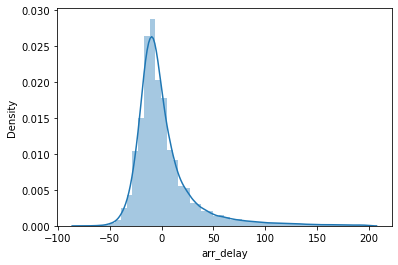

In [40]:
sns.distplot(df.arr_delay)

In [41]:
stat, p = shapiro(df.arr_delay)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.773, p=0.000
Probably not Gaussian


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
tset, pval = ttest_1samp(df.arr_delay, 0)

In [43]:
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 5.3559787818834534e-263
 we are rejecting null hypothesis


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [44]:
df.sort_values('fl_date')

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,passengers,capacity,total_gallons,dep_delay,nas_delay,security_delay,late_aircraft_delay,weather_delay,carrier_delay
99796,2018-01-01,DL,DL,DL,2514,DL,N950AT,2514,10397,ATL,...,442.0,1874.000000,212.000000,3.087060e+08,1.792453,18.600000,0.0,0.600000,10.800000,4.400000
87309,2018-01-01,NK,NK,NK,386,NK,N507NK,386,13204,MCO,...,861.0,1749.666667,210.333333,3.937194e+07,3.076923,11.000000,0.0,0.000000,0.000000,33.500000
87322,2018-01-01,NK,NK,NK,387,NK,N504NK,387,10874,CAK,...,861.0,1165.500000,108.500000,3.937194e+07,-4.538462,10.500000,0.0,15.500000,0.000000,3.500000
46293,2018-01-01,UA,UA_CODESHARE,UA,6218,YV,N88335,6218,12266,IAH,...,1208.0,2954.666667,552.000000,0.000000e+00,8.144444,5.000000,0.0,8.187500,1.375000,31.625000
17666,2018-01-01,AA,AA_CODESHARE,AA,5947,YV,N942LR,5947,14107,PHX,...,325.0,2233.000000,422.333333,0.000000e+00,13.830986,7.529412,0.0,42.058824,0.000000,13.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171504,2019-01-07,WN,WN,WN,1778,WN,N444WN,1778,14679,SAN,...,853.0,4052.000000,410.500000,1.723195e+08,13.084337,8.947368,0.0,35.157895,2.052632,3.842105
171503,2019-01-07,WN,WN,WN,1469,WN,N8568Z,1469,14679,SAN,...,853.0,4052.000000,410.500000,1.723195e+08,13.084337,8.947368,0.0,35.157895,2.052632,3.842105
171502,2019-01-07,WN,WN,WN,1406,WN,N959WN,1406,14679,SAN,...,853.0,4052.000000,410.500000,1.723195e+08,13.084337,8.947368,0.0,35.157895,2.052632,3.842105
23406,2019-01-07,AA,AA,AA,385,AA,N964TW,385,11298,DFW,...,550.0,1075.600000,476.200000,3.079852e+08,8.373626,12.090909,0.0,16.818182,1.636364,16.227273


In [45]:
df.fl_date = df.fl_date.apply(pd.to_datetime)

In [46]:
df.fl_date.value_counts()  

2019-01-02    15289
2019-01-07    14820
2018-01-02    14766
2019-01-04    14708
2019-01-03    14584
2019-01-06    14175
2018-01-03    13888
2018-01-07    13728
2019-01-01    13615
2018-01-05    13328
2018-01-01    13247
2019-01-05    12422
2018-01-06    11627
2018-01-04    11548
Name: fl_date, dtype: int64

In [47]:
df.groupby(df.fl_date.dt.month)['arr_delay'].mean()

fl_date
1    2.453842
Name: arr_delay, dtype: float64

In [48]:
np.std(df.groupby(df.fl_date.dt.month)['arr_delay'].mean())

0.0

In [49]:
sns.dist(df.fl_date.dt.month.value_counts())

AttributeError: module 'seaborn' has no attribute 'dist'

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [54]:
df.weather_delay.isna().value_counts()

True     96189
False    23811
Name: weather_delay, dtype: int64

In [55]:
df.weather_delay.value_counts()

0.0      22655
1.0         40
2.0         32
9.0         32
15.0        31
         ...  
127.0        1
126.0        1
164.0        1
94.0         1
136.0        1
Name: weather_delay, Length: 150, dtype: int64

In [93]:
df['weather_delay'].agg(['max', 'min', 'mean', 'std', 'median'])

max       199.000000
min         0.000000
mean        2.291733
std        12.991763
median      0.000000
Name: weather_delay, dtype: float64

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

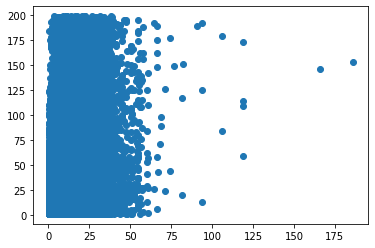

In [50]:
plt.scatter(df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]['dep_delay'], df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]['arr_delay'])

In [51]:
df[(df['dep_delay'] > 0)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,passengers,capacity,total_gallons,dep_delay,nas_delay,security_delay,late_aircraft_delay,weather_delay,carrier_delay
0,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.76087,3.875,0.0,30.0,0.0,6.5
1,2019-01-01,AA,AA_CODESHARE,AA,5243,OH,N591NN,5243,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.76087,3.875,0.0,30.0,0.0,6.5
2,2019-01-01,AA,AA_CODESHARE,AA,5249,OH,N578NN,5249,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.76087,3.875,0.0,30.0,0.0,6.5
3,2019-01-01,AA,AA_CODESHARE,AA,5261,OH,N584NN,5261,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.76087,3.875,0.0,30.0,0.0,6.5
4,2019-01-01,AA,AA_CODESHARE,AA,5358,OH,N577NN,5358,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.76087,3.875,0.0,30.0,0.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195291,2018-01-04,F9,F9,F9,1445,F9,N919FR,1445,10397,ATL,...,874.0,1292.000000,196.0,2.353042e+07,74.00000,2.000,0.0,95.0,0.0,13.5
195292,2018-01-07,F9,F9,F9,1445,F9,N902FR,1445,10397,ATL,...,874.0,1292.000000,196.0,2.353042e+07,74.00000,2.000,0.0,95.0,0.0,13.5
195293,2018-01-02,F9,F9,F9,1111,F9,N313FR,1111,12266,IAH,...,1222.0,1324.333333,129.0,2.353042e+07,9.00000,20.000,0.0,0.0,7.0,0.0
195294,2018-01-04,F9,F9,F9,1111,F9,N211FR,1111,12266,IAH,...,1222.0,1324.333333,129.0,2.353042e+07,9.00000,20.000,0.0,0.0,7.0,0.0


In [52]:
df[(df['dep_delay'] < 0)][['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
2243,-4.057143,-10.0,0.25,0.0,13.75,0.0,8.5
2244,-4.057143,-12.0,0.25,0.0,13.75,0.0,8.5
2245,-4.057143,-19.0,0.25,0.0,13.75,0.0,8.5
2246,-4.057143,-21.0,0.25,0.0,13.75,0.0,8.5
2247,-4.057143,-2.0,0.25,0.0,13.75,0.0,8.5
...,...,...,...,...,...,...,...
195240,-2.600000,-12.0,0.00,0.0,18.00,0.0,0.0
195241,-2.600000,-29.0,0.00,0.0,18.00,0.0,0.0
195242,-2.600000,18.0,0.00,0.0,18.00,0.0,0.0
195243,-2.600000,-21.0,0.00,0.0,18.00,0.0,0.0


In [54]:
df[df['arr_delay'] < 0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,passengers,capacity,total_gallons,dep_delay,nas_delay,security_delay,late_aircraft_delay,weather_delay,carrier_delay
0,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.760870,3.875,0.0,30.0,0.0,6.5
4,2019-01-01,AA,AA_CODESHARE,AA,5358,OH,N577NN,5358,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.760870,3.875,0.0,30.0,0.0,6.5
5,2019-01-01,AA,AA_CODESHARE,AA,5385,OH,N565NN,5385,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.760870,3.875,0.0,30.0,0.0,6.5
9,2019-01-02,AA,AA_CODESHARE,AA,5453,OH,N575NN,5453,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.760870,3.875,0.0,30.0,0.0,6.5
10,2019-01-02,AA,AA_CODESHARE,AA,5243,OH,N572NN,5243,13577,MYR,...,157.0,1325.400000,157.0,0.000000e+00,2.760870,3.875,0.0,30.0,0.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195278,2018-01-05,F9,F9,F9,1104,F9,N308FR,1104,12889,LAS,...,2174.0,666.000000,54.0,2.353042e+07,12.166667,0.000,0.0,0.0,0.0,48.0
195279,2018-01-06,F9,F9,F9,1104,F9,N317FR,1104,12889,LAS,...,2174.0,666.000000,54.0,2.353042e+07,12.166667,0.000,0.0,0.0,0.0,48.0
195292,2018-01-07,F9,F9,F9,1445,F9,N902FR,1445,10397,ATL,...,874.0,1292.000000,196.0,2.353042e+07,74.000000,2.000,0.0,95.0,0.0,13.5
195294,2018-01-04,F9,F9,F9,1111,F9,N211FR,1111,12266,IAH,...,1222.0,1324.333333,129.0,2.353042e+07,9.000000,20.000,0.0,0.0,7.0,0.0


In [58]:
len(df[(df['dep_delay'] > 0) & (df['arr_delay'] < 0)])/len(df[df['arr_delay'] < 0])

0.933327030186344

In [57]:
len(df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)])/len(df[df['arr_delay'] > 0])

0.966971913563013

#### **Task 6**: How many states cover 50% of US air traffic? 

In [31]:
df.dest_city_name.value_counts().head(17)

Chicago, IL              7003
Atlanta, GA              5584
Denver, CO               4569
Dallas/Fort Worth, TX    4241
Houston, TX              4039
Los Angeles, CA          3851
New York, NY             3759
Washington, DC           3241
Charlotte, NC            3234
Phoenix, AZ              3172
Las Vegas, NV            3096
San Francisco, CA        2539
Seattle, WA              2523
Orlando, FL              2404
Detroit, MI              2363
Baltimore, MD            2270
Minneapolis, MN          2215
Name: dest_city_name, dtype: int64

In [149]:
origin_state= df.origin_city_name.str.split(pat=", ",expand=True).iloc[:,1]


In [139]:
destination_state= df.dest_city_name.str.split(pat=", ",expand=True).iloc[:,1]


In [ ]:
air_traffic= pd.concat(origin_state, destination_state)

In [150]:
air_traffic.value_counts().head().sum()/air_traffic.value_counts().sum()*100

71.81074194837892

In [151]:
air_traffic.value_counts().head()

1 
TX    143529820
CA    135701332
IL     85224936
FL     84120960
NY     63483480
dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [146]:
df['duration_diff'] = df.crs_elapsed_time - df.actual_elapsed_time

In [147]:
df[df['dep_delay'] > 0]['duration_diff'].mean()

-0.5765562486964106

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [42]:
df.dest_city_name.value_counts().head(10)

Chicago, IL              7003
Atlanta, GA              5584
Denver, CO               4569
Dallas/Fort Worth, TX    4241
Houston, TX              4039
Los Angeles, CA          3851
New York, NY             3759
Washington, DC           3241
Charlotte, NC            3234
Phoenix, AZ              3172
Name: dest_city_name, dtype: int64

In [43]:
df.origin_city_name.value_counts().head(10).sum()

43273

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [21]:
df[df['arr_delay']> 0]['total_gallons'].mean()

161931855.66782308

In [25]:
df[df['arr_delay']< 0]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,passengers,capacity,total_gallons,dep_delay,nas_delay,security_delay,late_aircraft_delay,weather_delay,carrier_delay


In [30]:
df['arr_delay'].min()

15.0